In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('SMSSpamCollection.csv')
df1.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df1['Class'].value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: Class, dtype: float64

In [4]:
df1['Class']=df1['Class'].replace({'ham':0,'spam':1})

In [5]:
df1

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
y=df1['Class']
x=df1['sms']

y.shape,x.shape

((5572,), (5572,))

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer(stop_words='english')

In [9]:
vect.fit(x_train)
x_traint = vect.transform(x_train)
x_testt = vect.transform(x_test)

In [10]:
x_traint.shape

(3900, 7004)

In [40]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix as cm,accuracy_score,roc_auc_score,roc_curve
mnb = MultinomialNB()

mnb.fit(x_traint,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
y_train_pred=mnb.predict(x_traint)
y_train_prob=mnb.predict_proba(x_traint)[:,1:]
print('Confusion Matrix of train\n',cm(y_train,y_train_pred))
print('\nAccuracy score of train\n',accuracy_score(y_train,y_train_pred))
print('\nAUC Value of train\n',roc_auc_score(y_train,y_train_prob))

Confusion Matrix of train
 [[3363   14]
 [   8  515]]

Accuracy score of train
 0.9943589743589744

AUC Value of train
 0.998299711636076


In [47]:
y_test_pred=mnb.predict(x_testt)
y_test_prob=mnb.predict_proba(x_testt)[:,1:]
print('Confusion Matrix of test\n',cm(y_test,y_test_pred))
print('\nAccuracy score of test\n',accuracy_score(y_test,y_test_pred))
print('\nAUC Value of test\n',roc_auc_score(y_test,y_test_prob))

Confusion Matrix of test
 [[1438   10]
 [  11  213]]

Accuracy score of test
 0.9874401913875598

AUC Value of test
 0.9851950966850829


In [49]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

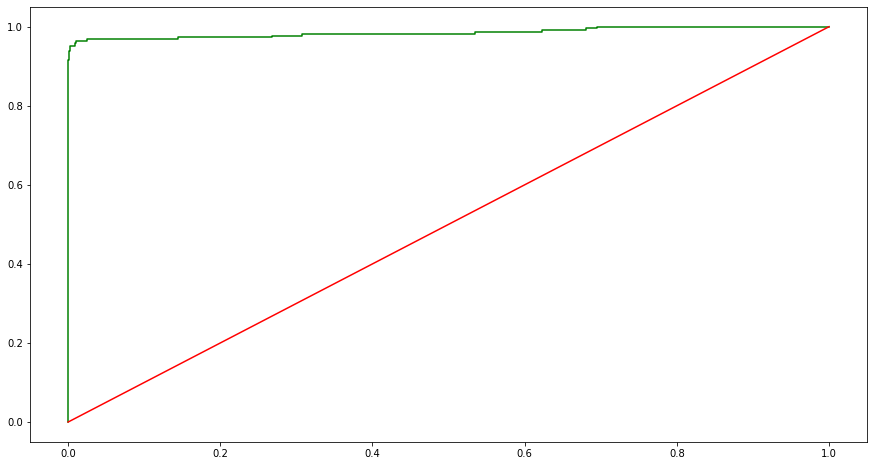

In [61]:
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,'g')
thresholds[0]=thresholds[0]-1
plt.plot(fpr,fpr,'r')
#plt.plot(fpr,thresholds,'b')
plt.show()

In [58]:
spm = df({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
spm.head()

,fpr,tpr,thresholds
0,0.0,0.000000,-2.0
1,0.0,0.276786,1.0
2,0.0,0.321429,1.0
3,0.0,0.339286,1.0
4,0.0,0.343750,1.0


In [62]:
spm[(spm['fpr']==0) & (spm['tpr']>0.5)]

,fpr,tpr,thresholds
16,0.0,0.723214,0.999999
17,0.0,0.732143,0.999998
18,0.0,0.758929,0.999991
19,0.0,0.767857,0.999990
20,0.0,0.799107,0.999956
21,0.0,0.808036,0.999950
22,0.0,0.816964,0.999923
23,0.0,0.825893,0.999918
24,0.0,0.915179,0.986525
